In [1]:
# Tema: Comparendos Norte de Santander 2016 - 2020
# Grupo 1: Angie Moreno/202110008171 - Diego Vargas/202110047171 - Luis Ochoa/202519024507
#importamos la librerias para poder trabajar con nuestro DataFrame y poder graficar nuestro histograma
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Cargamos el CSV a un DataFrame resultante del proceso "cleaning" (df)
df = pd.read_csv("ComparendosNorteSantanderSource_clean.csv")

In [3]:
# Verificamos la cantidad de columnas y filas de nuestro df, para verificar que se halla cargado correctamente
df.shape

(22121, 6)

In [ ]:
#Observamos las columnas disponibles en nuestro df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22121 entries, 0 to 22120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FECHA              22121 non-null  object 
 1   CODIGO_INFRACCION  22121 non-null  object 
 2   INFRACCION         22121 non-null  object 
 3   LUGAR              22121 non-null  object 
 4   CLASE_VEHICULO     22121 non-null  object 
 5   VALOR              22121 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


In [5]:
#Teniendo en cuenta, los campos de nuestro df, el campo que cumple con las caracteristicas para un histograma, es: VALOR
#Miramos la distribucion de los datos de VALOR
df['VALOR'].value_counts()


VALOR
 689455.0     2935
 390621.0     2564
 781242.0     1881
 414058.0     1501
 344728.0     1501
              ... 
-27603.0         1
 4968696.0       1
 292601.0        1
 182876.0        1
 219451.0        1
Name: count, Length: 110, dtype: int64

In [6]:
#Ahora verificamos el menor valor registrado para VALOR
df['VALOR'].min()

np.float64(-27603.0)

In [7]:
#Ahora verificamos el maximo valor registrado para VALOR
df['VALOR'].max()

np.float64(42134400.0)

In [8]:
#Ahora verificamos el valor medio registrado para VALOR
df['VALOR'].mean()

np.float64(519888.076856078)

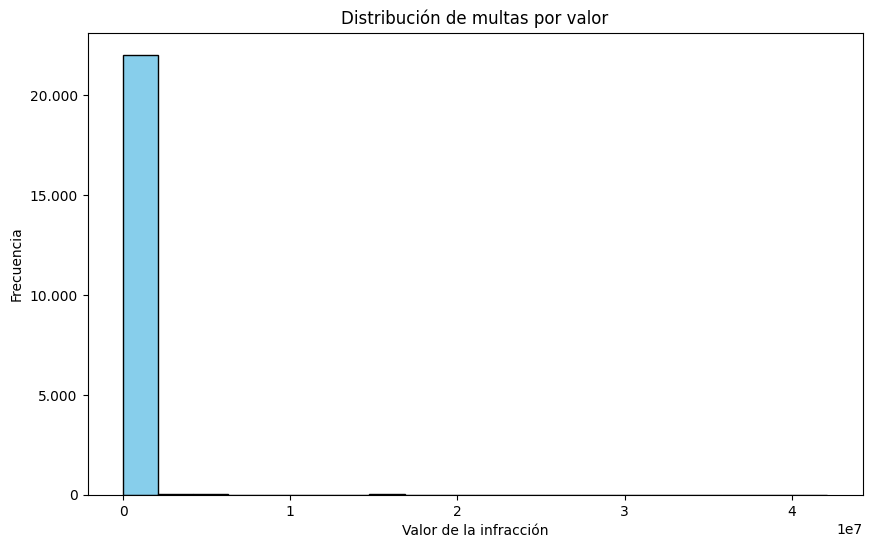

In [9]:
# Definimos el tamaño de la grafica
plt.figure(figsize=(10, 6))

# Establecemos los intervalos (bins) color de barras y color de borde
plt.hist(df['VALOR'], bins=20, color='skyblue', edgecolor='black')

# Definimos formato para poner "puntos" a los valores
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Asignamos el formato configurado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Nombramos los ejes y el titulo de la grafica
plt.xlabel('Valor de la infracción')
plt.ylabel('Frecuencia')
plt.title('Distribución de multas por valor')

# Mostrar el histograma
plt.show()

#Donde se observa que no se puede apreciar de una manera clara la frecuencia, para la columna de VALOR

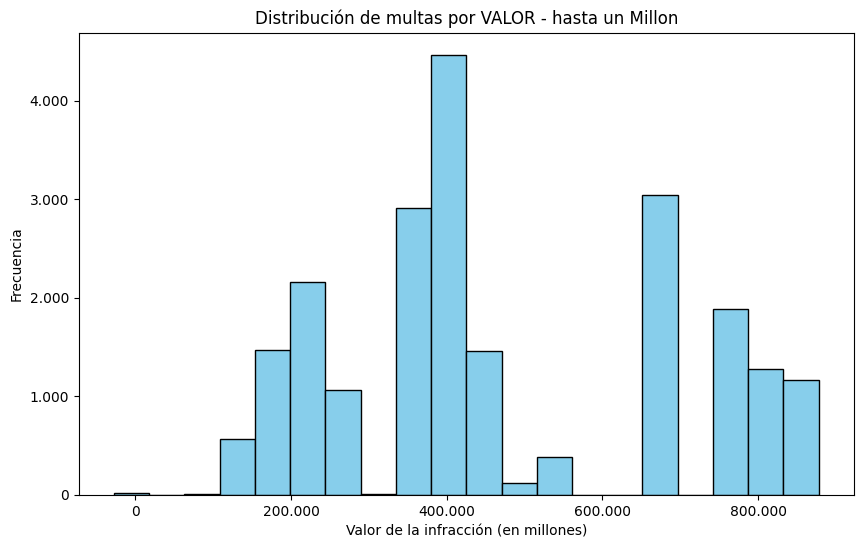

In [10]:
# Teniendo en cuenta el histograma anterior, y los datos minimos, medio y maximo de VALOR
# Filtramos los valores igual o menor a un millon
df_filtrado = df[df['VALOR'] <= 1000000]

# Crear el histograma con valores ajustados
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['VALOR'], bins=20, color='skyblue', edgecolor='black')

# Definimos formato para poner "puntos" a los valores
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Asignamos el formato configurado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Asignamos el formato configurado al eje X
plt.gca().xaxis.set_major_formatter(formatter)

# Nombramos etiquetas y título de la grafica
plt.xlabel('Valor de la infracción (en millones)')
plt.ylabel('Frecuencia')
plt.title('Distribución de multas por VALOR - hasta un Millon')

# Mostrar la gráfica
plt.show()

# Donde se puede observar una distribucion de frecuencia mas clara, donde la mayor cantidad de registros, se encuentran en el intervalo entre los $200.000 a $600.000

C:\Users\lhob9\AppData\Local\Temp\ipykernel_12616\3429200791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['VALOR'] = df_filtrado['VALOR'] / 1000000


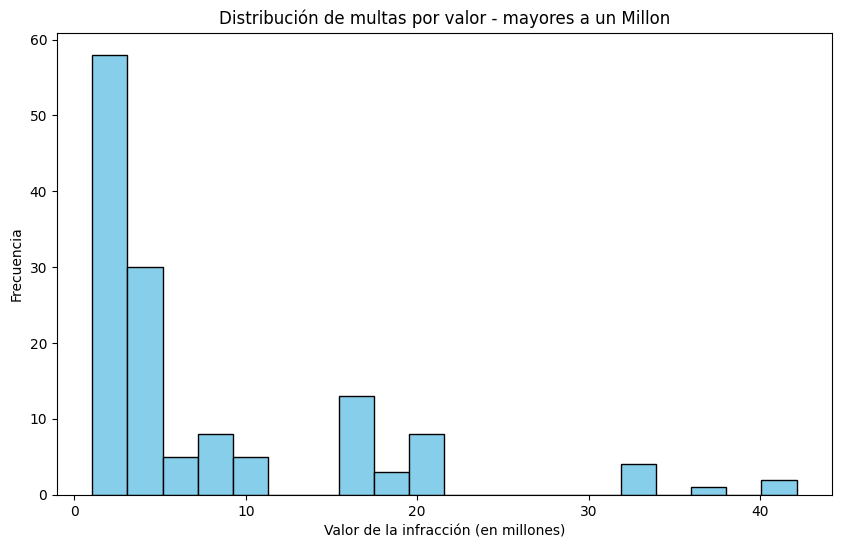

In [11]:
# Realizamos el mismo ejecicio para aquellos valores superiores a un millon
# Filtramos los valores igual o menor a un millon
df_filtrado = df[df['VALOR'] > 1000000]

# Como son valores muy altos, los dividimos entre 1.000.000 para que se puedan graficar de una mejor manera
df_filtrado['VALOR'] = df_filtrado['VALOR'] / 1000000

# Crear el histograma con valores ajustados
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['VALOR'], bins=20, color='skyblue', edgecolor='black')

# Nombramos etiquetas y título de la grafica
plt.xlabel('Valor de la infracción (en millones)')
plt.ylabel('Frecuencia')
plt.title('Distribución de multas por valor - mayores a un Millon')

# Mostrar la gráfica
plt.show()

# Donde se puede observar que la mayor cantidad de registros, se encuentran en el intervalo entre los $0 a $10.000.000